# BhargavaGaggainpali_DSC680_Week4_Project1_Code

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data into a data frame
df_train = pd.read_csv('train.csv')
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
#Copy the original data into data frame
df_train_orig=df_train.copy()

In [4]:
#Basic Information about the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
#Number of rows and variables in data
df_train.shape

(614, 13)

In [6]:
#Verify the data for null values
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Replace missing values
df_train['Gender'].fillna(df_train['Gender'].mode()[0], inplace=True)
df_train['Married'].fillna(df_train['Married'].mode()[0], inplace=True)
df_train['Dependents'].fillna(df_train['Dependents'].mode()[0], inplace=True)
df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode()[0], inplace=True)
df_train['Credit_History'].fillna(df_train['Credit_History'].mode()[0], inplace=True)

In [8]:
#Check for missing values
df_train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#Verify data in Loan_Amount_term
df_train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

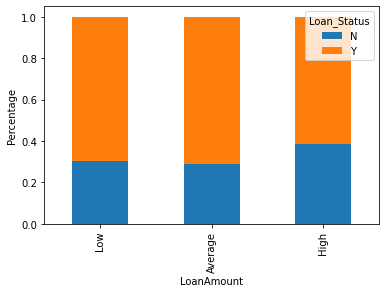

In [10]:
#Loan Amount vs Apprival Bar Chart
bins=[0,100,200,700]
group=['Low','Average','High']
df_train['LoanAmount_bin']=pd.cut(df_train['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(df_train['LoanAmount_bin'],df_train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

In [11]:
#Replace character values with numerical values
df_train['LoanAmount'].fillna(df_train['LoanAmount'].median(), inplace=True)
df_train['Loan_Amount_Term'].fillna(df_train['Loan_Amount_Term'].mode()[0], inplace=True)
#df_train=df_train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
df_train['Dependents'].replace('3+', 3,inplace=True)
df_train['Loan_Status'].replace('N', 0,inplace=True)
df_train['Loan_Status'].replace('Y', 1,inplace=True)

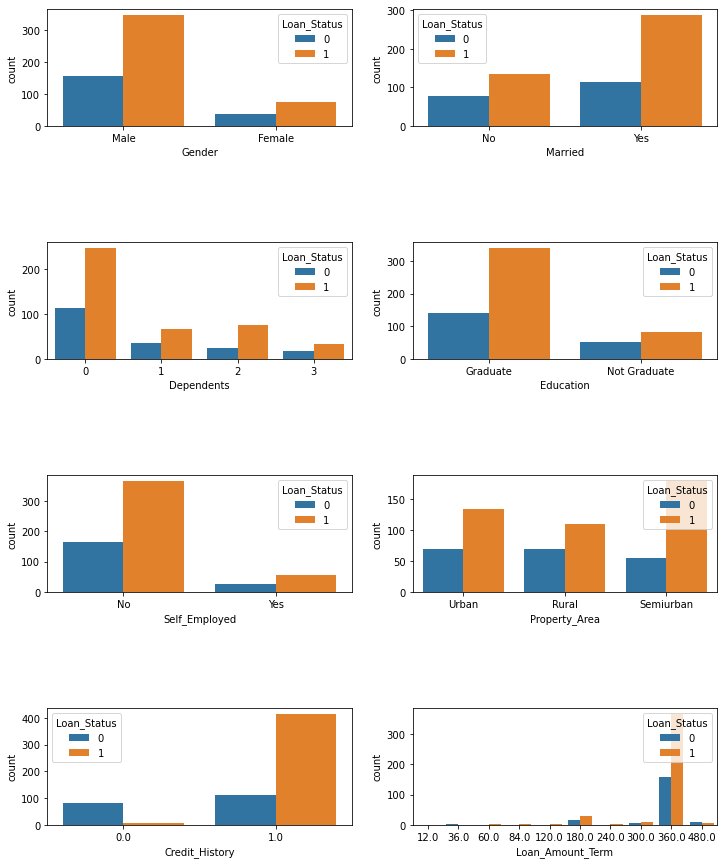

In [12]:
#Visuals on Categorical variables vs Loan approval.
catg_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(catg_cols):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=df_train,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

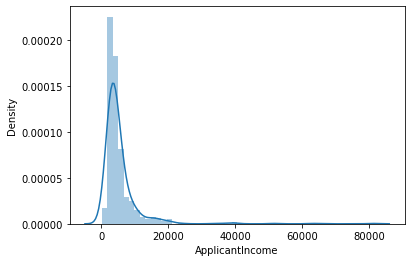

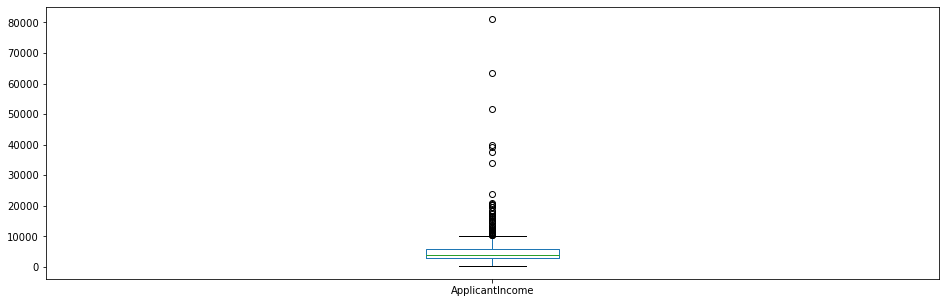

In [13]:
#Distribution of ApplicantIncome
sns.distplot(df_train['ApplicantIncome'])
plt.show()
df_train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

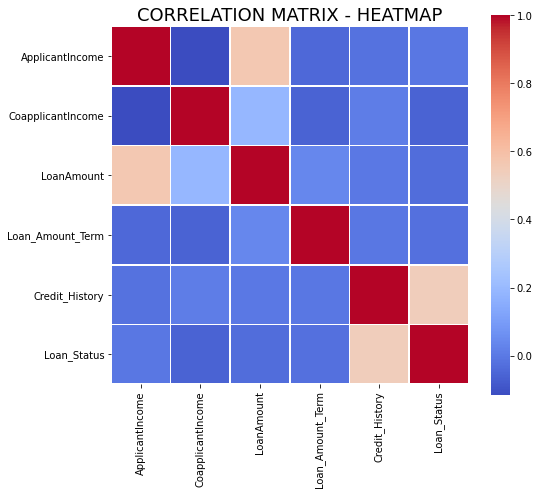

In [14]:
#  Draw a correlations matrix, it is defined via Pearson function  
corr = df_train.corr() # corr() is a function used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [15]:
#Dropping unwanted features
df_train=df_train.drop('Loan_ID',axis=1)


In [16]:
X = df_train.drop('Loan_Status',1)
y = df_train.Loan_Status
X.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_bin
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Average
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Average
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,High
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Low
7,Male,Yes,3,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,Average
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Average
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,High


In [17]:
#Convert categorical features to numerical
X = pd.get_dummies(X)
X.head(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,...,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,LoanAmount_bin_Low,LoanAmount_bin_Average,LoanAmount_bin_High
0,5849,0.0,128.0,360.0,1.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,0,1,1,0,0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,0,0,1,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,1,0
5,5417,4196.0,267.0,360.0,1.0,0,1,0,1,0,...,1,0,0,1,0,0,1,0,0,1
6,2333,1516.0,95.0,360.0,1.0,0,1,0,1,0,...,0,1,1,0,0,0,1,1,0,0
7,3036,2504.0,158.0,360.0,0.0,0,1,0,1,1,...,1,0,1,0,0,1,0,0,1,0
8,4006,1526.0,168.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,0,1,0,1,0
9,12841,10968.0,349.0,360.0,1.0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1


In [18]:
#Splitting data for train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)


In [19]:
#LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)


LogisticRegression()

In [20]:
pred_test = model.predict(x_test)
accuracy = accuracy_score(y_test,pred_test)
print('Accuracy of the Logistic Regression Model is',accuracy)

Accuracy of the Logistic Regression Model is 0.827027027027027


0.827027027027027

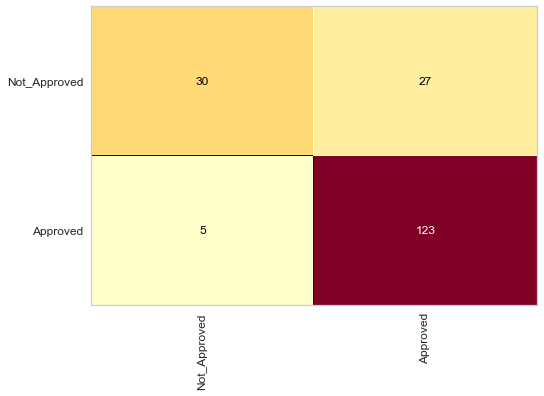

In [21]:
#Build Confusion Matrix for LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Approved','Approved']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_test, y_test)

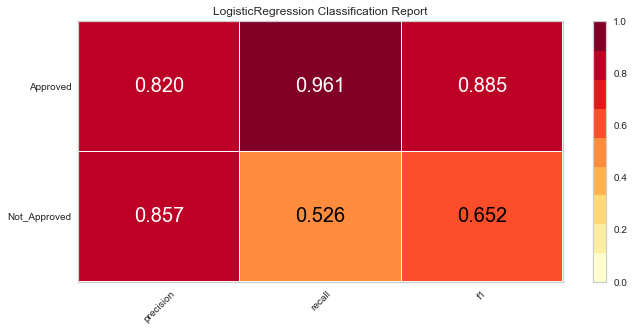

In [22]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
from yellowbrick.classifier import ClassificationReport
plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

In [23]:
#Build RandomForestClassifier Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1, max_depth=10)
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
score=accuracy_score(y_test,pred_test)
print ('RandomForestClassifier Accuracy is',score)

RandomForestClassifier Accuracy is 0.7891891891891892


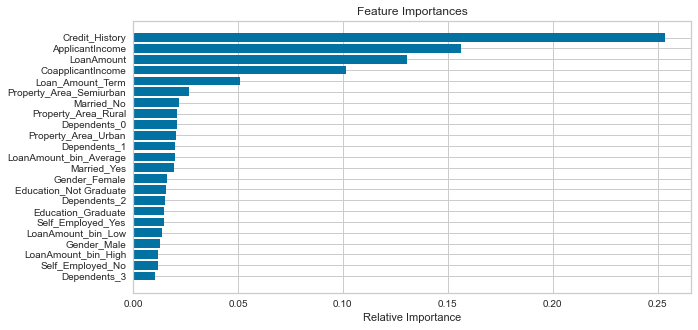

In [24]:
#Feature Importance
importances = model.feature_importances_
features = x_train.columns
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

0.7891891891891892

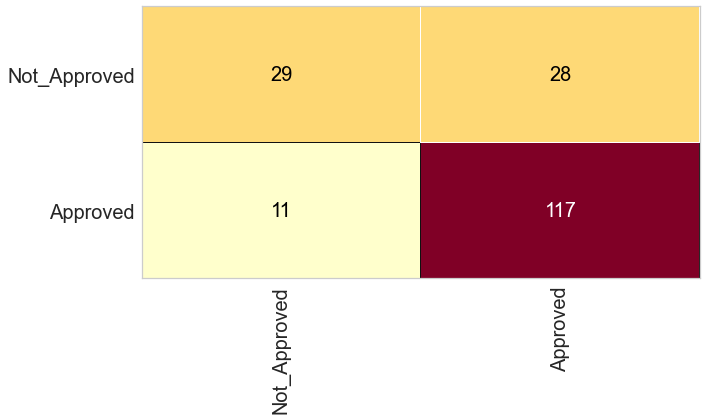

In [25]:
#ConfusionMatrix for RandomForestClassifier Model
from yellowbrick.classifier import ConfusionMatrix
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Approved','Approved']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_test, y_test)

In [26]:
#Build Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)
pred_test=model.predict(x_test)
pred_proba=model.predict_proba(x_test)
score=accuracy_score(y_test,pred_test)
print ('Naive Bayes Accuracy is',score)

Naive Bayes Accuracy is 0.8162162162162162


0.8162162162162162

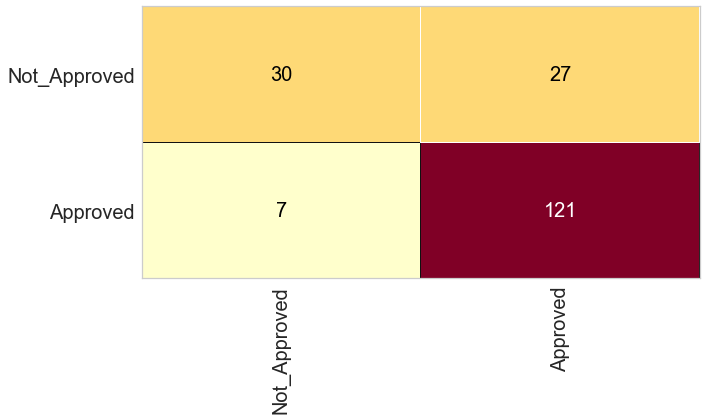

In [27]:
#Confusion Matrix Naive Bayes Model
from yellowbrick.classifier import ConfusionMatrix
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_Approved','Approved']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(x_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(x_test, y_test)

In [28]:
#Build SVC Model
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state = 1)
classifier.fit(x_train,y_train)
pred_test=classifier.predict(x_test)
score=accuracy_score(y_test,pred_test)
print ('accuracy_score of SVM',score)

accuracy_score of SVM 0.6918918918918919


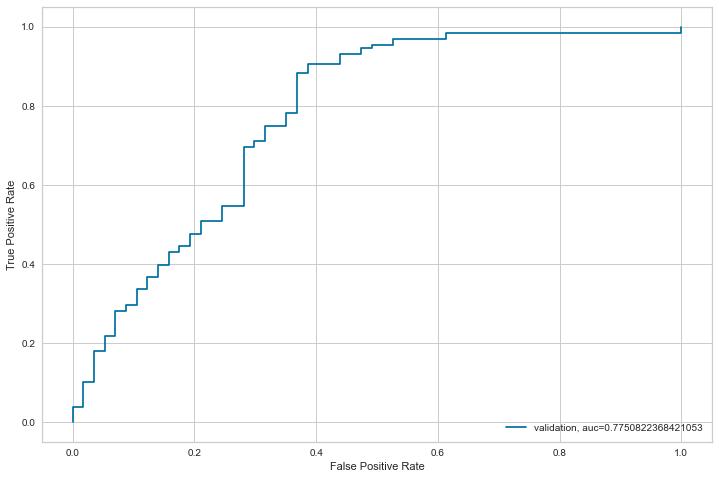

In [29]:
#Measure Area Under Curve
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test, pred_proba[:,1])
auc = metrics.roc_auc_score(y_test, pred_proba[:,1])
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()